In [32]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import confusion_matrix, classification_report
import seaborn as sns
import matplotlib.pyplot as plt
from imblearn.over_sampling import SMOTE

In [2]:
import sklearn
import imblearn

print(f"scikit-learn version: {sklearn.__version__}")
print(f"imbalanced-learn version: {imblearn.__version__}")


scikit-learn version: 1.2.2
imbalanced-learn version: 0.12.3


In [3]:
df = pd.read_csv("../Feature_engineering/company_feat_eng_df.csv")

In [4]:
df

,status,isClosed,founded_at,active_days,first_funding_at,last_funding_at,funding_total_usd,first_milestone_at,last_milestone_at,milestones,...,country_code_CAN,country_code_DEU,country_code_ESP,country_code_FRA,country_code_GBR,country_code_IND,country_code_ISR,country_code_NLD,country_code_USA,country_code_other
0,3,0,-0.161184,0.403698,-0.392899,-0.291683,0.384564,-0.553941,-0.393942,-0.366961,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
1,3,0,0.048769,0.233583,-0.392899,-0.291683,0.384564,-0.553941,-0.393942,-0.366961,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
2,3,0,0.048769,0.233583,-0.392899,-0.291683,0.384564,-1.190471,-1.838912,-0.366961,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
3,3,0,0.048769,0.233583,-0.392899,-0.291683,0.384564,-1.190471,-1.838912,-0.366961,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
4,3,0,0.678003,-0.369189,-0.392899,-0.291683,0.384564,0.719117,0.328542,-0.366961,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
44073,3,0,-0.371242,0.562082,-0.392899,-0.291683,0.384564,-0.553941,-0.393942,-0.366961,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
44074,3,0,0.048769,0.233583,-0.392899,-0.291683,0.384564,0.719117,0.328542,-0.366961,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
44075,3,0,-0.791673,0.849809,-0.392899,-0.291683,0.384564,-0.553941,-0.393942,-0.366961,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
44076,3,0,-0.161184,0.403698,-0.392899,-0.291683,0.384564,1.992176,1.773511,2.138829,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0


In [5]:
x = df.drop("status", axis = 1)
y = df[["status"]]

In [6]:
y.value_counts()

status
3         41393
0          1783
1           802
2           100
Name: count, dtype: int64

In [7]:
y["status"].replace([[0,1,2],3],[0,1], inplace = True)
y.value_counts()

C:\Users\HP\AppData\Local\Temp\ipykernel_15352\3879653658.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  y["status"].replace([[0,1,2],3],[0,1], inplace = True)
C:\Users\HP\AppData\Local\Temp\ipykernel_15352\3879653658.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  y["status"].replace([[0,1,2],3],[0,1], inplace = True)


status
1         41393
0          2685
Name: count, dtype: int64

In [11]:
# Oversampling
smote = SMOTE(random_state=42)
x_resampled, y_resampled = smote.fit_resample(x, y)

In [12]:
y_resampled.value_counts()

status
0         41393
1         41393
Name: count, dtype: int64

In [13]:
x_resampled.shape

(82786, 37)

In [14]:
x_resampled

,isClosed,founded_at,active_days,first_funding_at,last_funding_at,funding_total_usd,first_milestone_at,last_milestone_at,milestones,relationships,...,country_code_CAN,country_code_DEU,country_code_ESP,country_code_FRA,country_code_GBR,country_code_IND,country_code_ISR,country_code_NLD,country_code_USA,country_code_other
0,0,-0.161184,0.403698,-0.392899,-0.291683,0.384564,-0.553941,-0.393942,-0.366961,-0.514252,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
1,0,0.048769,0.233583,-0.392899,-0.291683,0.384564,-0.553941,-0.393942,-0.366961,0.644714,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
2,0,0.048769,0.233583,-0.392899,-0.291683,0.384564,-1.190471,-1.838912,-0.366961,-0.514252,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
3,0,0.048769,0.233583,-0.392899,-0.291683,0.384564,-1.190471,-1.838912,-0.366961,0.138444,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
4,0,0.678003,-0.369189,-0.392899,-0.291683,0.384564,0.719117,0.328542,-0.366961,-0.514252,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
82781,1,-0.332411,-0.938750,-0.392899,-0.291683,0.384564,-0.553941,-0.393942,-0.366961,0.644714,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
82782,1,-2.477598,0.981026,-0.141520,-0.291683,0.384564,-0.553941,-0.393942,-0.366961,0.521629,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
82783,1,0.031565,-1.960768,-0.392899,-0.291683,0.384564,0.719117,0.991824,2.138829,2.668840,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
82784,1,-1.195551,-0.080101,0.641064,1.761413,0.332340,-0.553941,-0.393942,-0.366961,-0.174587,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0


In [15]:
x_train,x_test,y_train,y_test = train_test_split(x_resampled,y_resampled, test_size = 0.2)

In [16]:
x_train

,isClosed,founded_at,active_days,first_funding_at,last_funding_at,funding_total_usd,first_milestone_at,last_milestone_at,milestones,relationships,...,country_code_CAN,country_code_DEU,country_code_ESP,country_code_FRA,country_code_GBR,country_code_IND,country_code_ISR,country_code_NLD,country_code_USA,country_code_other
62925,1,0.500347,-5.656367,-0.392899,-0.291683,0.384564,0.082588,-0.283715,2.138829,0.707824,...,0.0,0.0,0.000000,0.000000,0.000000,0.0,0.0,0.0,1.000000,0.0
10958,0,0.258618,0.049336,-0.392899,-0.291683,0.384564,-0.553941,-0.393942,-0.366961,0.644714,...,0.0,0.0,0.000000,0.000000,0.000000,0.0,0.0,0.0,1.000000,0.0
20585,0,0.887539,-0.611010,1.674514,1.058681,0.827726,-0.553941,-0.393942,-0.366961,-0.514252,...,0.0,0.0,0.000000,0.000000,0.000000,0.0,0.0,0.0,1.000000,0.0
75219,1,-0.663631,-0.516870,-0.392899,-0.291683,0.384564,-0.553941,-0.393942,-0.366961,-1.074436,...,0.0,0.0,0.000000,0.391053,0.000000,0.0,0.0,0.0,0.608947,0.0
41067,0,0.678003,-0.369189,-0.392899,-0.291683,0.384564,1.355647,1.773511,2.138829,0.138444,...,1.0,0.0,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.000000,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
43702,0,-1.212522,1.105153,1.674514,2.409044,0.363317,-0.553941,-0.393942,-0.366961,1.711062,...,0.0,0.0,0.000000,0.000000,0.000000,0.0,0.0,0.0,1.000000,0.0
69422,1,-0.023979,-2.702728,-0.392899,-0.291683,0.384564,-0.553941,-0.393942,-0.366961,-0.514252,...,0.0,0.0,0.653501,0.000000,0.346499,0.0,0.0,0.0,0.000000,0.0
15126,0,0.048769,0.233583,-0.392899,-0.291683,0.384564,-1.190471,-1.838912,-0.366961,-1.434174,...,0.0,0.0,0.000000,0.000000,0.000000,0.0,0.0,0.0,1.000000,0.0
28447,0,-0.161184,0.403698,-1.427376,-2.992411,0.384564,-0.553941,-0.393942,-0.366961,-1.434174,...,1.0,0.0,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.000000,0.0


In [17]:
y_test

,status
71161,0
44969,0
58185,0
34970,0
44017,1
...,...
78152,0
36367,1
24757,1
37710,1


In [18]:
y_train.value_counts()

status
0         33132
1         33096
Name: count, dtype: int64

In [19]:
y_test.value_counts()

status
1         8297
0         8261
Name: count, dtype: int64

# Logistic Regression

In [20]:
model_logR = LogisticRegression()
paramgrid_logR = {
    'C': [0.1, 1, 10],                   
    'solver': ['liblinear', 'lbfgs'],     
    'penalty': ['l2'],             
    'max_iter': [100, 200] 
}
grid_logR = GridSearchCV(model_logR,paramgrid_logR, cv = 5)

In [22]:
grid_logR.fit(x_train,np.ravel(y_train))

C:\Users\HP\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\HP\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _c

GridSearchCV(cv=5, estimator=LogisticRegression(),
             param_grid={'C': [0.1, 1, 10], 'max_iter': [100, 200],
                         'penalty': ['l2'], 'solver': ['liblinear', 'lbfgs']})

In [31]:
grid_logR.best_params_

{'C': 10, 'max_iter': 200, 'penalty': 'l2', 'solver': 'lbfgs'}

In [26]:
y_pred_logr = grid_logR.best_estimator_.predict(x_test)
class_report = classification_report(y_test, y_pred_logr)
print(class_report)

              precision    recall  f1-score   support

           0       1.00      0.99      0.99      8261
           1       0.99      1.00      0.99      8297

    accuracy                           0.99     16558
   macro avg       0.99      0.99      0.99     16558
weighted avg       0.99      0.99      0.99     16558



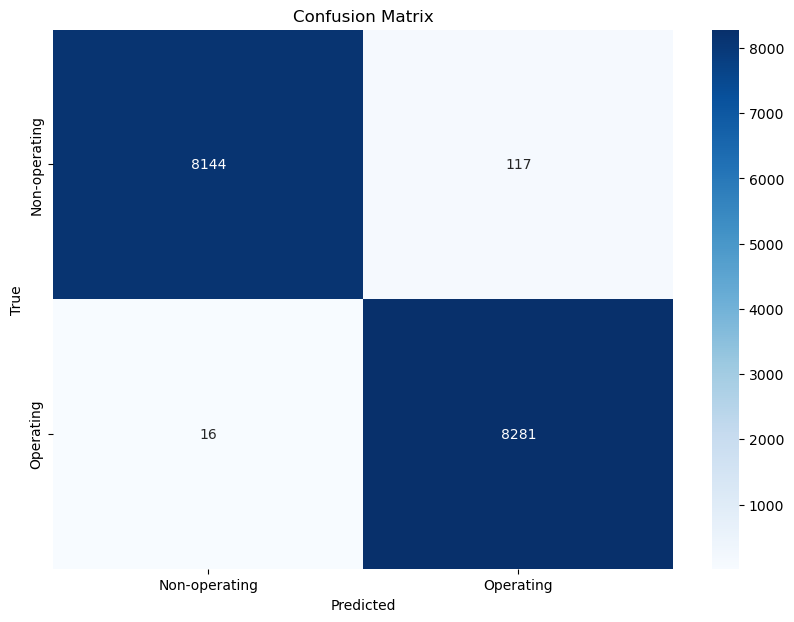

In [27]:
# Define class labels
class_labels = ["Non-operating", "Operating"]

# Plot the confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred_logr)
plt.figure(figsize=(10, 7))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap="Blues", xticklabels=class_labels, yticklabels=class_labels)
plt.xlabel("Predicted")
plt.ylabel("True")
plt.title("Confusion Matrix")
plt.show()

#  Naive Bayes

In [28]:
model_nb = GaussianNB()
model_nb.fit(x_train,y_train)

C:\Users\HP\anaconda3\Lib\site-packages\sklearn\utils\validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


GaussianNB()

In [29]:
y_pred_nb = model_nb.predict(x_test)
class_report = classification_report(y_test, y_pred_nb)
print(class_report)

              precision    recall  f1-score   support

           0       1.00      0.97      0.98      8261
           1       0.97      1.00      0.98      8297

    accuracy                           0.98     16558
   macro avg       0.98      0.98      0.98     16558
weighted avg       0.98      0.98      0.98     16558



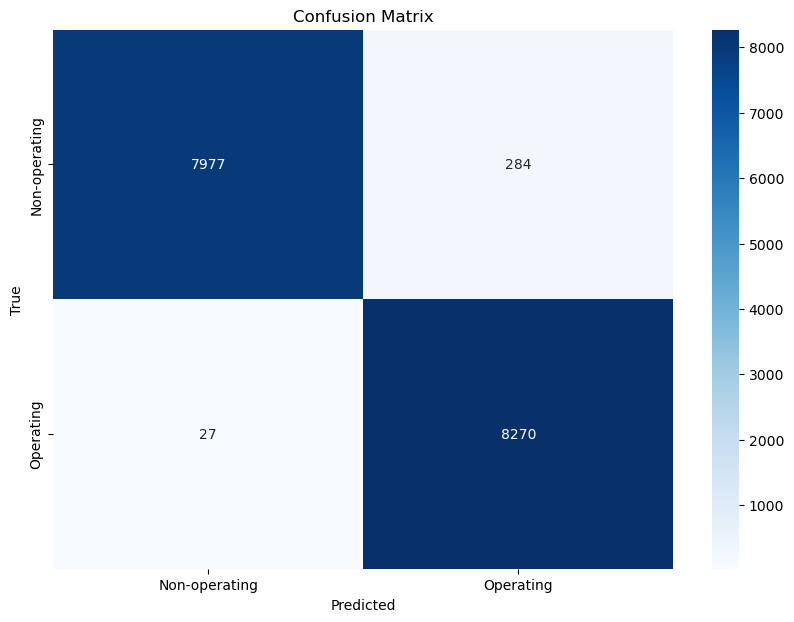

In [30]:

# Plot the confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred_nb)
plt.figure(figsize=(10, 7))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap="Blues", xticklabels=class_labels, yticklabels=class_labels)
plt.xlabel("Predicted")
plt.ylabel("True")
plt.title("Confusion Matrix")
plt.show()